# Mesothelioma data visualization

In [1]:
import io
import pathlib
import re

import geopandas
import geoplot
import matplotlib
import pandas

## Read United States state geometry data

In [2]:
try:
    from quilt.data.ResidentMario import geoplot_data
except ModuleNotFoundError:
    # Install data from https://quiltdata.com/package/ResidentMario/geoplot_data
    import quilt
    quilt.install(
        package='ResidentMario/geoplot_data',
        hash='1f5c34c8e6afdaef0b73b1e3681855fa91b1bdd677b98550b0ce0402a344026f',
    )
    from quilt.data.ResidentMario import geoplot_data

In [3]:
contiguous_usa = geopandas.read_file(geoplot_data.contiguous_usa())
# From https://residentmario.github.io/geoplot/examples/nyc-parking-tickets.html
contiguous_usa['State'] = [
    'Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington', 'Arizona',
    'California', 'Colorado', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Wyoming',
    'Arkansas', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
    'Louisiana', 'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire',
    'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia', 'Mississippi',
    'South Carolina', 'Illinois', 'Indiana', 'Kentucky', 'North Carolina', 'Ohio',
    'Tennessee', 'Virginia', 'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
    'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan',
]

contiguous_usa.head(2)

,id,adm1_code,geometry,State
0,0,USA-3514,"POLYGON ((-89.59940899999999 48.010274, -89.48...",Minnesota
1,1,USA-3515,"POLYGON ((-111.194189 44.561156, -111.291548 4...",Montana


### Read CDC Wonder mortality data

In [4]:
path = pathlib.Path('data/mortality.txt')
tsv, *docs = re.split(r'^"---"$', path.read_text(), flags=re.MULTILINE)
mortality_df = pandas.read_table(io.StringIO(tsv), dtype={'State Code': str})
mortality_df.tail(3)

,Notes,State,State Code,Deaths,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Age-Adjusted Rate Standard Error,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
49,NaN,Wisconsin,55,1013,89226178,1.04022,0.97677,1.10678,0.03288,1.13532,1.06647,1.20744,0.03567
50,NaN,Wyoming,56,102,8547706,1.16936,0.95122,1.42270,0.11706,1.19330,0.97299,1.44859,0.11815
51,Total,NaN,NaN,40096,4793002373,0.80698,0.79906,0.81495,0.00405,0.83655,0.82838,0.84478,0.00418


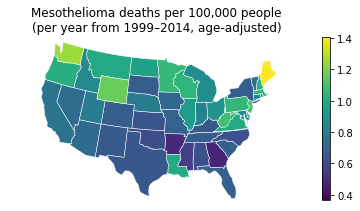

In [5]:
# https://residentmario.github.io/geoplot/choropleth.html
plot = geoplot.choropleth(
    contiguous_usa.merge(mortality_df),
    hue='Age-Adjusted Rate',
    projection=geoplot.crs.AlbersEqualArea(),
    cmap='viridis',
    linewidth=0.5,
    edgecolor='white',
    k=None,
    legend=True,
    figsize=(7, 3)
)
title = plot.set_title('Mesothelioma deaths per 100,000 people\n(per year from 1999–2014, age-adjusted)')

matplotlib.pyplot.savefig('figure/mortality.svg', bbox_inches='tight', pad_inches=0.1, transparent=True)
matplotlib.pyplot.savefig('figure/mortality.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)